<a href="https://colab.research.google.com/github/suann124/AIinTeaching/blob/main/lectures/Firstorder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First-Order Systems

## Objectives (TO BE COMPLETED)


*   Introduce first-order (single-variable) linear ordinary differential equations (ODEs)
*   ...

## What are first-order systems?

A first-order (single-variable, i.e., scalar) linear ordinary differential equation (ODE) is represented as

$$
\frac{dx(t)}{dt} = A x(t) + B u(t),
$$

where $A \in \mathbb{R}$ and $B \in \mathbb{R}$. Here, $x(t)$ is the state of the system at time $t$ and $u(t)$ is an input to the system at time $t$. Let $x_{0} \in \mathbb{R}$ be the initial condition.


> You may ask: What makes a differential equation an ODE?

❌ ❌ ❌ ❌ ❌

> You may (also) ask what makes an ODE a linear ODE, but more on it below.

How to link to another page? And, send back from that page to here?

❌ ❌ ❌ ❌ ❌

## Why do we care about first-order systems?

They are the simplest family of models we will encounter, and we will use them to get a sense of several key concepts we will cover throughout the semester.

## Example: Cruise control as a first-order system

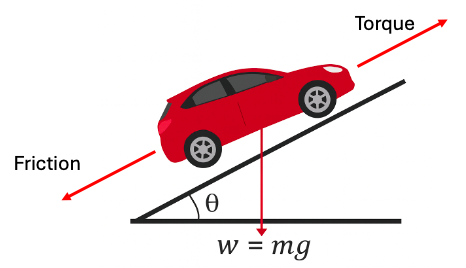



The change in the speed of a car with respect to time can be represented as

$$\dot{v}(t) = -\frac{1}{\tau} v(t) + \frac{K}{\tau} w(t) + d(t),$$

where $v(t)$ is the speed at time $t$, $w(t)$ is the throttle command at time $t$ (this will play the role of a control input), and the signal $d$ represents the effects of disturbances (e.g., slope or wind). The constant parameters $\tau$ and $K$ capture the physical properties of the vehicle (e.g., mapping throttle to drive force) and the interaction of the vehicle with the environment (e.g., drag and rolling resistance).

For a cruise control system, a common objective is making the difference between a driver-specified desired speed, call it $v_d(t)$, and the actual speed $v(t)$ small. Let us introduce a new signal, which we will refer to as the error and denote as $e$:

$$e(t) = v_d(t) -v(t).$$

For a constant desired speed, $\dot{v}_d(t) = 0$ for all $0\geq 0.$ Then, $\dot{e}(t) = -v(t)$ and we can derive the following differential equation.

$$\dot{e}(t) = \frac{1}{\tau} e(t) + \frac{K}{\tau} w(t) + d(t) -\frac{1}{\tau} v_d$$

Our (control) objective will then be keeping $|e(t)|$ as close to zero as possible.

The ODE for $e$ includes three inputs: $u,$ $d$, and $v_d$. While we will later work with multiple inputs, for now, let us consider that a control input has already been designed in the form of $w(t) = k_p e(t)$ and there is no disturbance (i.e., $d \equiv 0$). Then, the model boils down to


$$\dot{e}(t) = \left(\frac{1}{\tau}+ \frac{Kk_p}{\tau}\right) e(t) - \frac{1}{\tau} v_d.$$

This model will inform us about the changes in $e$ with respect to $v_d$.

By choosing $x = e$, $u=w$,

$$ A = \left(\frac{1}{\tau}+ \frac{Kk_p}{\tau}\right) \text{, and } B = -\frac{1}{\tau},$$

this ODE can be written in the form of the generic first-order system above.

## What can we do with a model of a system?


1.  Predict system behavior by solving the ODE (for some given initial condition and input).
2.  Analyze the system behvior (for all initial conditions and inputs).
3.  Design a controller to influence the system behavior.

While this class focuses on analysis of systems and design of controllers, simulation the system behavior (for some initial controls and/or inputs) offer visual insights. So, let's start by simulating the cruise control model.







## Simulating the system behavior

Let us pick some arbitrary values for $A,$ $B,$ $v_d$ and initial conditions and simulate the system behavior.

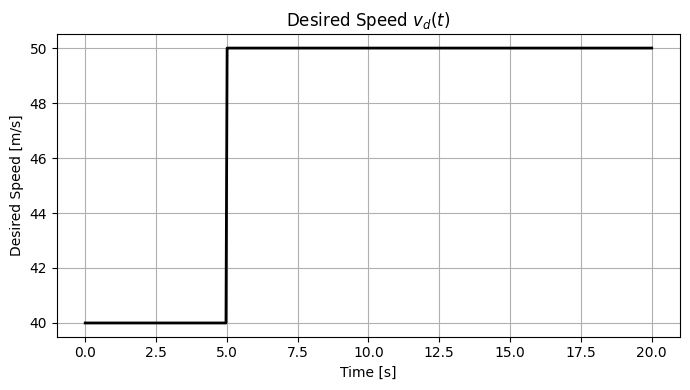

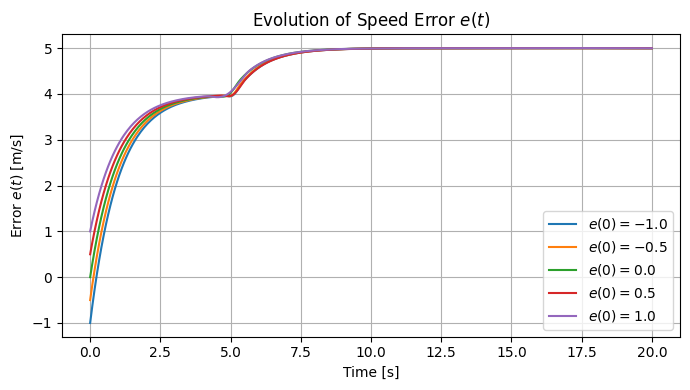

In [ ]:
"""
Solve the first-order differential equation
    e_dot = A * e + B * v_d(t)
for a given desired speed profile v_d(t) and multiple initial conditions.

User specifies:
    - A, B: system parameters
    - x0_vec: list/array of initial error values
"""


import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ======================================================
# User-defined parameters
# ======================================================
A = -1.0
B = 0.1
x0_vec = [-1.0, -0.5, 0.0, 0.5, 1.0]   # initial error values (m/s)
t_span = (0, 20)                         # time interval [s]
t_eval = np.linspace(t_span[0], t_span[1], 500)

# ======================================================
# Desired speed profile
# ======================================================
def v_d(t):
    """Desired speed changes from 40 to 50 at t = 5 s."""
    return 40.0 if t < 5.0 else 50.0

# ======================================================
# Differential equation
# ======================================================
def e_dot(t, e):
    """Derivative of the error."""
    return A * e + B * v_d(t)

# ======================================================
# Solve for each initial condition
# ======================================================
solutions = {}
for x0 in x0_vec:
    sol = solve_ivp(e_dot, t_span, [x0], t_eval=t_eval)
    solutions[x0] = sol

# ======================================================
# Plot 1: Desired speed profile
# ======================================================
plt.figure(figsize=(7, 4))
v_d_values = np.array([v_d(t) for t in t_eval])
plt.plot(t_eval, v_d_values, 'k', linewidth=2)
plt.title("Desired Speed $v_d(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Desired Speed [m/s]")
plt.grid(True)
plt.tight_layout()

# ======================================================
# Plot 2: Error trajectories
# ======================================================
plt.figure(figsize=(7, 4))
for x0, sol in solutions.items():
    plt.plot(sol.t, sol.y[0], label=f"$e(0) = {x0}$")

plt.title("Evolution of Speed Error $e(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Error $e(t)$ [m/s]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

We will frequently simulate the behavior of the systems we work with, but, let us now go back to our main goal: analysis of system behavior and, eventually, design of controller so that the system we control behaves as we want it to behave.

## What does it mean to be a solution to an ODE?

The solution satisfies the ODE and its initial condition. That is, if $\bar{x}$ is a solution, then

$$
\frac{d\bar{x}(t)}{dt} = A \bar{x}(t) + B u(t)
$$ and

$$\bar{x}(0) = x_0.$$

## Solution of the ODE for a first-order system

The solution is

$$
x(t) = e^{a t} x_0 + \int_{0}^{t} e^{a (t - \tau)} b\,u(\tau)\,d\tau.
$$

How do we know? Well, check whether it satis the conditions for being a solution.

Check the initial condition:

$$ x(0) = e^{A \cdot 0} x_0 + 0 = x_0.  ~~✅ $$

Check whether it satisfied the differential equation:

$$ \begin{aligned}
\frac{d x(t)}{d t}
&= A e^{A t} x_0 + a \int_{0}^{t} e^{A (t - \tau)} B\,u(\tau)\,d\tau
    + e^{A (t - t)} B\,u(t) - 0 \\[6pt]
&= A \left[e^{A t} x_0 + \int_{0}^{t} e^{A (t - \tau)} B\,u(\tau)\,d\tau \right] + B\,u(t) \\[6pt]
&= A\,x(t) + B \,u(t) ~~✅ \\[12pt]
\end{aligned}  $$

> How did we take the derivative of an integral? Recall: [Leibniz integral rule](https://en.wikipedia.org/wiki/Leibniz_integral_rule)

## Complete solution = free response + forced response

Let us take a closer look at the solution:

$$
x(t) = \color{red}{e^{a t} x_0} + \color{blue} {\int_{0}^{t} e^{a (t - \tau)} b\,u(\tau)\,d\tau}.
$$

The so-called free response is

$$ \color{red}{x_{free}(t) = e^{a t} x_0},$$

and it does not involve any contribution from input $u$. It is therefore sometimes also called the unforced response.

The so-called forced response is

$$ \color{blue}{x_{forced}(t) = \int_{0}^{t} e^{a (t - \tau)} b\,u(\tau)\,d\tau}$$

and it does not involve any contribution from the initial condition.

We can therefore analyze the free response and forced response separately to reason about the complete solution.

## Free response and stability of a system

The free response is the part of the system’s output that arises solely from its initial conditions, with no external input applied.

## Free response and stability of a system

The free response (also called the natural response) is the part of the system’s output that arises solely from its initial conditions, with no external input applied.

Note that the only system parameter that appear in $e^{At}x_0$ is $A.$ Let's analyze the free response for three cases with respect to the value of $A.$


#### Case 1: $A < 0$
$$
x_{free}(t) = e^{A t} x_0 \to 0 \quad \text{as } t \to \infty
$$  

regardless of the value of $x_0$. We will call the system (asymptotically) <u>stable</u> in this case. The free response converges to  $0$  <u>for all</u> initial conditions.

#### Case 2: $A > 0$
$$
|e^{A t} x_0| \text{ grows as } t \text{ increases unboundedly} \text{ (assuming $x_0 \neq 0$)}
$$  

We will call the system <u>unstable</u> in this case. The free response diverges <u>for some</u> initial conditions.

(For $x_0 = 0$, $x(t)$ remains at $0$.)


#### Case 3: $A = 0$
$$
x(t) = x_0 \text{ (constant over time)}
$$  

We call the system <u>marginally stable</u> in this case. While it is theoretically possible, this case is not practically interesting. (Why?)


Let us now simulate the free response of a linear system for several different values of $A$ and different initial conditions $x_0.$

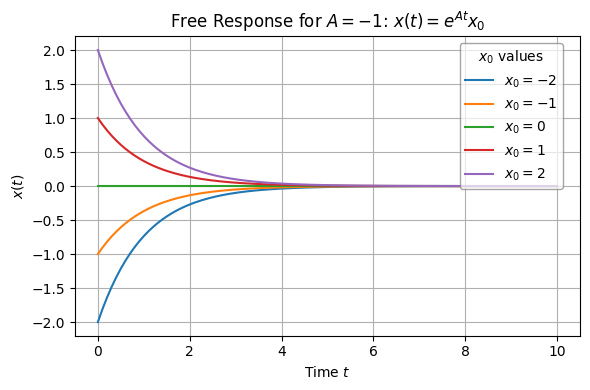

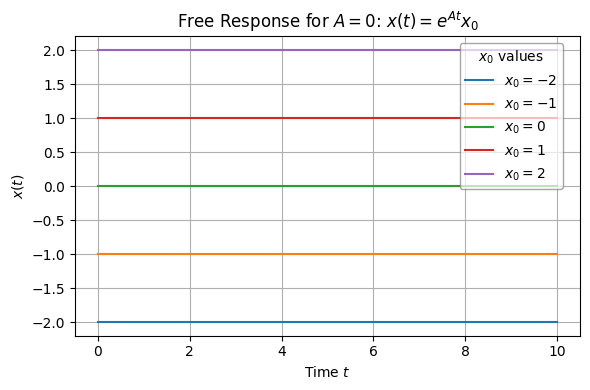

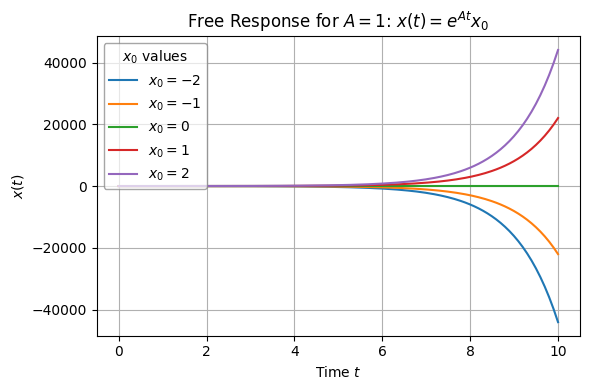

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x0_values = [-2, -1, 0, 1, 2]
t = np.linspace(0, 10, 200)
A_values = [-1, 0, 1]

# Generate plots
for A in A_values:
    plt.figure(figsize=(6, 4))
    for x0 in x0_values:
        x = np.exp(A * t) * x0
        plt.plot(t, x, label=f"$x_0 = {x0}$")

    plt.title(rf"Free Response for $A = {A}$: $x(t) = e^{{A t}} x_0$")
    plt.xlabel("Time $t$")
    plt.ylabel("$x(t)$")
    plt.grid(True)

    if A > 0:
    # Legend inside the plot at bottom-right
      plt.legend(
          title="$x_0$ values",
          loc="upper left",
          bbox_to_anchor=(0, 1.00),  # slightly inset from the edge
          ncol=1,
         frameon=True,
        facecolor="white",
        edgecolor="gray",
        framealpha=0.7   # transparency (0 = fully transparent, 1 = opaque)
      )
    else:
      plt.legend(
          title="$x_0$ values",
          loc="upper right",
          bbox_to_anchor=(0.98, 1.0),  # slightly inset from the edge
          ncol=1,
        frameon=True,
        facecolor="white",
        edgecolor="gray",
        framealpha=0.7   # transparency (0 = fully transparent, 1 = opaque)
      )

    plt.tight_layout()
    plt.show()


### Free Response and Time Constant

Focus on the case $A < 0$ (i.e., the system is asymptotically stable).


The **time constant** $T$ of the system is defined as  
$$
T = \frac{1}{|A|} = -\frac{1}{A}.
$$

Hence,  
$$
x(t) = e^{A t} x_0 = e^{-t/T} x_0.
$$

Moral of the story: How fast the system approaches $0$ is not merely a function of the time that passes but it is a function of the ratio $t/T$, i.e., how many time constants amount of time have passed.

❌ ❌ ❌ ❌ ❌
> Here is more on the practical uses of time constants: [Optional reading](https://suann124.github.io/AIinTeaching/lectures/Firstorder_optional.html)

How to link to another page? And, send back from that page to here?

❌ ❌ ❌ ❌ ❌

Let's look at an example.

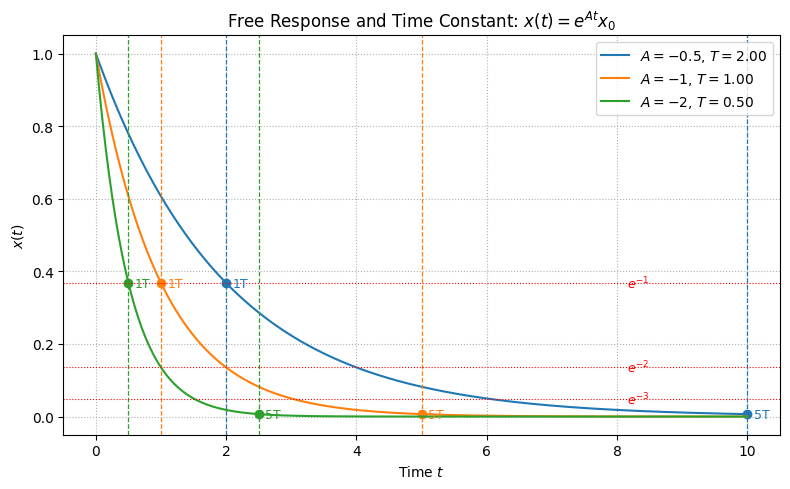

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
x0 = 1.0
t = np.linspace(0, 10, 400)
A_values = [-0.5, -1, -2]  # asymptotically stable cases (a < 0)
colors = ['tab:blue', 'tab:orange', 'tab:green']  # consistent colors

plt.figure(figsize=(8, 5))

for A, color in zip(A_values, colors):
    T = -1 / A
    x = np.exp(A * t) * x0
    plt.plot(t, x, color=color, label=f"$A = {A}$, $T = {T:.2f}$")

    # Plot vertical dashed lines at 1T and 5T in same color
    for k, label_text in zip([1, 5], ['1T', '5T']):
        tT = k * T
        plt.axvline(tT, color=color, linestyle='--', linewidth=0.9)
        plt.plot(tT, np.exp(A * tT) * x0, 'o', color=color)
        plt.text(tT + 0.1, np.exp(A * tT) * x0, f"{label_text}",
                 color=color, va='center', fontsize=9)

# Add horizontal e^{-k} reference lines
for k in range(1, 4):
    plt.axhline(np.exp(-k), color='r', linestyle=':', linewidth=0.8)
    plt.text(8.15, np.exp(-k), f"$e^{{-{k}}}$", color='r', va='center', fontsize=9)

# Labels and formatting
plt.title(r"Free Response and Time Constant: $x(t) = e^{A t} x_0$")
plt.xlabel("Time $t$")
plt.ylabel("$x(t)$")
plt.grid(True, which='both', linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()


## Forced Response


Recall that the forced response for a first-order system is

$$
x_{forced}(t) = e^{A t} x_0 + \int_{0}^{t} e^{A (t - \tau)} B\,u(\tau)\,d\tau.
$$

It determines how the system reacts to external inputs.

The table below summarizes a comparison between the free response and forced response of a stable system.



| Part | Caused by | Exists if input = 0? | Depends on IC? | Behavior (for stable systems) |
|------|------------|----------------------|----------------|-------------------------------|
| **Free response** | The system’s own dynamics | ✅ Yes | ✅ Yes | Decays over time |
| **Forced response** | The external input | ❌ No | ❌ No | May persist as long as input acts |

The forced response is determined by the input. Therefore, for a better understanding, we will look into several (canonical) input types.


## Forced response with a step input (and zero initial conditions)

Consider the **step input** with magnitude $u_m$:

$$
u(t) =
\begin{cases}
0, & t<0,\\[3pt]
u_m, & t\ge 0.
\end{cases}
$$


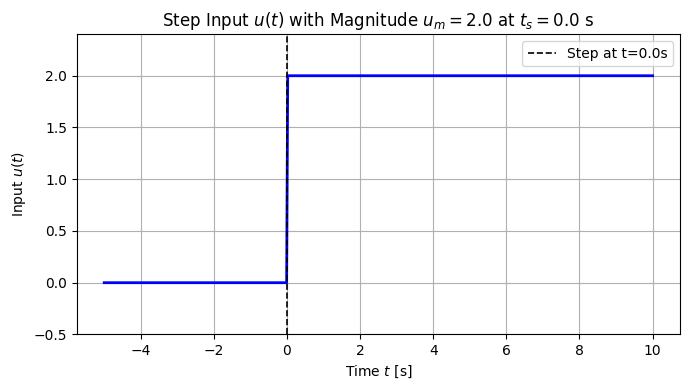

In [ ]:
"""
Generate and plot a step input signal:
        u(t) = 0 for t < t_s
        u(t) = u_m for t >= t_s
"""

import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# User-defined parameters
# ======================================================
u_m = 2.0              # step magnitude
t_s = 0.0              # time at which the step occurs (default = 0)
t_start = -5           # start time (s)
t_end = 10             # end time (s)
num_points = 500       # number of points

# ======================================================
# Define the time vector and step function
# ======================================================
t = np.linspace(t_start, t_end, num_points)
u = np.where(t < t_s, 0, u_m)   # step at t_s

# ======================================================
# Plot the step input
# ======================================================
plt.figure(figsize=(7, 4))
plt.plot(t, u, 'b', linewidth=2)
plt.title(rf"Step Input $u(t)$ with Magnitude $u_m = {u_m}$ at $t_s = {t_s}$ s")
plt.xlabel("Time $t$ [s]")
plt.ylabel(r"Input $u(t)$")
plt.grid(True)
plt.axvline(t_s, color='k', linestyle='--', linewidth=1.2, label=f"Step at t={t_s}s")
plt.ylim(-0.5, 1.2 * u_m)
plt.legend()
plt.tight_layout()
plt.show()

For this step input, the forced response becomes
$$
\begin{aligned}
x_{forced}(t)
&= \int_{0}^{t} e^{a (t - \tau)} b\,u(\tau)\,d\tau \\
&= B\,u_m\, e^{A t} \int_{0}^{t} e^{-A\tau}\, d\tau \\
&=  B\,u_m\, e^{a t}\,\frac{1 - e^{-A t}}{A}  ~~~~~~(\text{assuming } a \neq 0)\\[2mm]
&=  \frac{B\,u_m}{A}\,(e^{A t} - 1).
\end{aligned}
$$


Then, for a stable first-order system (i.e., A < 0), $x_{forced}$ approaches a so-called <u>steady-state value</u>:

$$ x_{ss} = -\frac{B}{A}\,u_m, $$

and the <u>steady-state gain</u> for the system under step input is

$$\frac{x_{ss}}{u_m} = -\frac{B}{A}.$$



The forced response approaches its steady-state exponentially:
$$
x(t) = x_{ss}\,\big(1 - e^{A t}\big)
$$
Recall the **time constant** is
$$
T = \frac{1}{|A|}.
$$

At $t = \tau$, the output reaches about **63.2%** of its final value:
$$
\begin{aligned}
x(T) &= x_{ss}\,(1 - e^{-1}) \approx 0.632\,x_{ss} \\
x(2T) &= x_{ss}\,(1 - e^{-2}) \approx 0.869\,x_{ss}\\
x(3T) &= x_{ss}\,(1 - e^{-3}) \approx 0.950\,x_{ss}.\\
\end{aligned}
$$

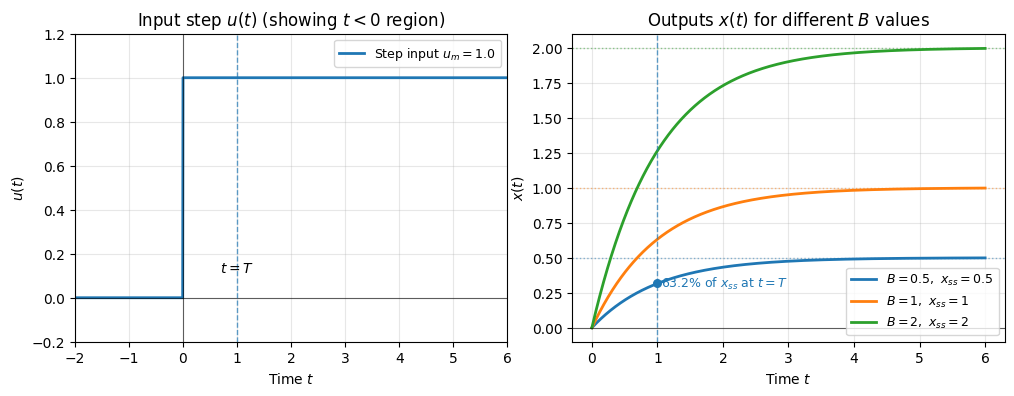

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_inputs_outputs_multi_B(A=-1.0, B_values=(0.5, 1.0, 2.0),
                                u_m=1.0, t_pre=2.0, t_end=8.0, n_pts=1200):
    """
    Consistent notation: x(t) = -(B/A) * u_m * (1 - e^{A t})
    Shows input step (t<0 region) and responses for several B values.
    """
    if A >= 0:
        raise ValueError("Use A < 0 for a stable first-order system.")
    B_values = list(B_values)
    if len(B_values) == 0:
        raise ValueError("Provide at least one value in B_values.")

    # Time setup
    t_full = np.linspace(-t_pre, t_end, n_pts)
    t = np.linspace(0.0, t_end, n_pts)
    u = np.where(t_full >= 0, u_m, 0.0)
    T = 1.0 / abs(A)   # time constant

    # --- Figure setup ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=False, gridspec_kw=dict(wspace=0.15))
    ax_u, ax_x = axes

    # --- Left: Step input ---
    ax_u.plot(t_full, u, linewidth=2, color='tab:blue', label=f"Step input $u_m={u_m}$")
    ax_u.axhline(0, color='k', linewidth=0.8, alpha=0.6)
    ax_u.axvline(0, color='k', linewidth=0.8, alpha=0.6)
    ax_u.axvline(T, linestyle='--', linewidth=1, alpha=0.7)
    ax_u.text(T, u_m*0.1, r"$t=T$", ha="center", va="bottom")
    ax_u.set_xlim(-t_pre, t_end)
    ax_u.set_ylim(-0.2*u_m, 1.2*u_m)
    ax_u.set_title("Input step $u(t)$ (showing $t<0$ region)")
    ax_u.set_xlabel("Time $t$")
    ax_u.set_ylabel("$u(t)$")
    ax_u.grid(True, alpha=0.3)
    ax_u.legend(fontsize=9)

    # --- Right: Outputs x(t) for multiple B values ---
    cmap = plt.get_cmap('tab10')

    for i, B in enumerate(B_values):
        color = cmap(i % 10)
        x_ss = -(B/A) * u_m
        x = x_ss * (1.0 - np.exp(A * t))
        ax_x.plot(t, x, linewidth=2, color=color, label=fr"$B={B:g},\ x_{{ss}}={x_ss:g}$")
        ax_x.axhline(x_ss, linestyle=':', linewidth=1, color=color, alpha=0.5)

    # 63.2% marker for first curve
    B0 = B_values[0]
    xss0 = -(B0/A) * u_m
    ax_x.scatter([T], [xss0*(1 - np.e**-1)], s=30, zorder=5, color=cmap(0))
    ax_x.annotate(r"$63.2\%$ of $x_{ss}$ at $t=T$",
                  xy=(T, xss0*(1 - np.e**-1)),
                  xytext=(T*1.05, xss0*(1 - np.e**-1)),
                  ha="left", va="center", fontsize=9, color=cmap(0))

    # Axis formatting
    ax_x.axhline(0, color='k', linewidth=0.8, alpha=0.6)
    ax_x.axvline(T, linestyle='--', linewidth=1, alpha=0.7)
    ax_x.set_title("Outputs $x(t)$ for different $B$ values")
    ax_x.set_xlabel("Time $t$")
    ax_x.set_ylabel("$x(t)$")
    ax_x.grid(True, alpha=0.3)
    ax_x.legend(fontsize=9)

    plt.show()

# Example run
plot_inputs_outputs_multi_B(A=-1.0, B_values=(0.5, 1.0, 2.0), u_m=1.0, t_pre=2.0, t_end=6.0)

## Putting back together: complete solution = free response + forced response.


The complete solution for a step input with magnitude $u_m$ (applied at $t=0$) and an initial condition $x_0$ is

$$
x(t) = x_0 e^{A t} - \frac{B}{A} u_m \left( 1 - e^{A t} \right).
$$

Let us look at an example.

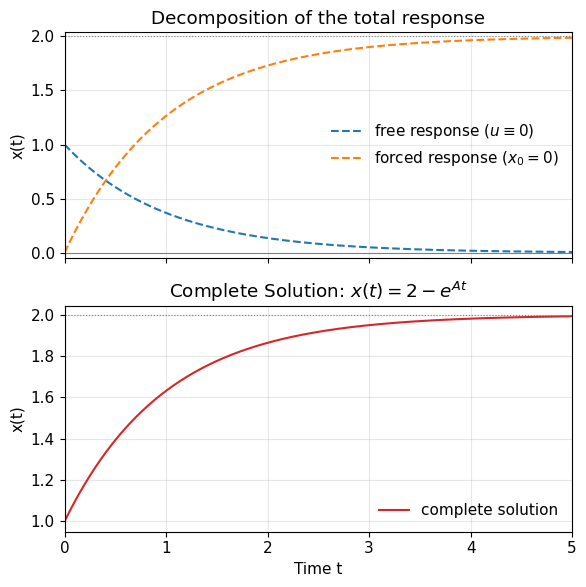

In [ ]:
plt.rcParams.update({
    "mathtext.fontset": "dejavusans",
    "font.family": "DejaVu Sans",
    "font.size": 11
})
# ---- Parameters ----
A = -1.0           # stable system (a < 0)
B = 1.0
x0 = 1.0
u_m = 2.0          # chosen so that -(b/a)*u_m = 2
# ---- Time and analytic responses ----
t = np.linspace(0, 5, 400)
x_free   = x0 * np.exp(A*t)
x_forced = -(B/A)*u_m*(1 - np.exp(A*t))
x_total  = x_free + x_forced
# ---- Two stacked subplots ----
fig, ax = plt.subplots(2, 1, figsize=(6,6), sharex=True)
# (1) Free + Forced components
ax[0].plot(t, x_free, '--', label='free response ($u\\equiv0$)')
ax[0].plot(t, x_forced, '--', label='forced response ($x_0=0$)')
ax[0].axhline(0, color='gray', lw=0.8)
ax[0].axhline(2, color='gray', ls=':', lw=0.8)
ax[0].set_ylabel("x(t)")
ax[0].set_title("Decomposition of the total response")
ax[0].legend(frameon=False)
ax[0].grid(alpha=0.3)
ax[0].set_xlim(t[0], t[-1])
ax[0].set_ylim(min(x_free.min(), x_forced.min()) - 0.05,
               max(x_free.max(), x_forced.max()) + 0.05)
# (2) Complete solution
ax[1].plot(t, x_total, color='C3', label='complete solution')
ax[1].axhline(2, color='gray', ls=':', lw=0.8)
ax[1].set_xlabel("Time t")
ax[1].set_ylabel("x(t)")
ax[1].set_title("Complete Solution: $x(t) = 2 - e^{A t}$")
ax[1].legend(frameon=False)
ax[1].grid(alpha=0.3)
ax[1].set_xlim(t[0], t[-1])
ax[1].set_ylim(x_total.min() - 0.05, x_total.max() + 0.05)
plt.tight_layout()
plt.show()


## Revisit the cruise control example

The code/figures below demonstrate the effect of the variables time constants and stead-state gains on the system response.

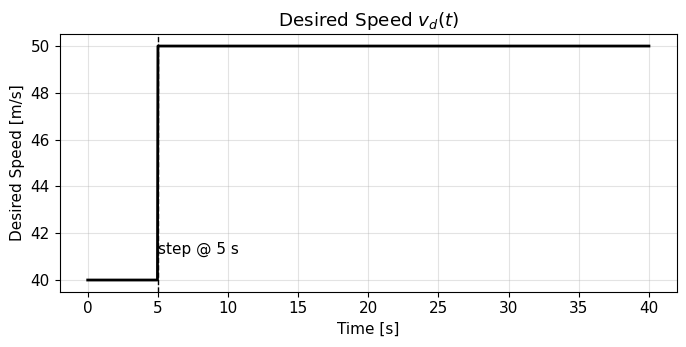

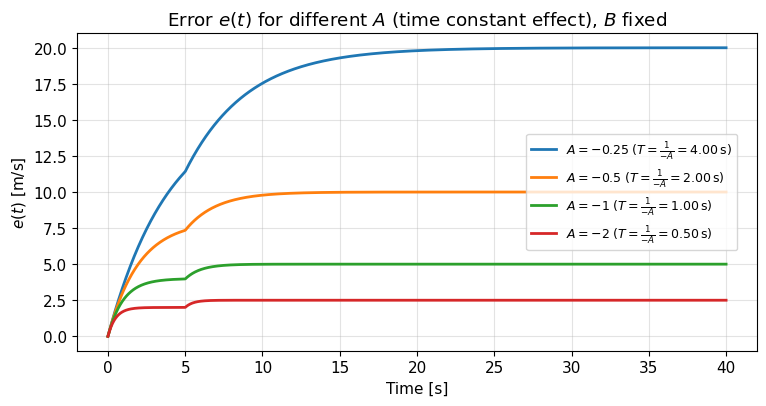

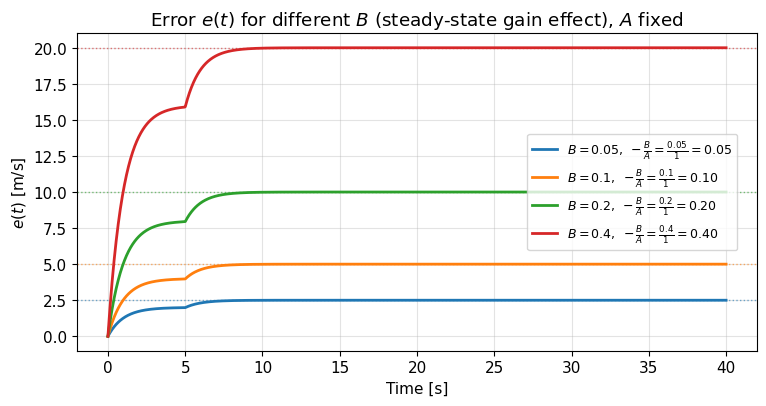

In [ ]:
"""
Demonstrate the impact of time constant (T = 1/(-A)) and steady-state gain (-B/A)
on the first-order error model:

    e_dot = A * e + B * v_d(t)

Desired speed:
    v_d(t) = 40 for t < 5
           = 50 for t >= 5

"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ======================================================
# Simulation parameters
# ======================================================
t_span = (0.0, 40.0)
t_eval = np.linspace(t_span[0], t_span[1], 1200)

# Use one IC to isolate parameter effects
x0_vec = [0.0]

# Parameter sweeps
A_list = [-0.25, -0.5, -1.0, -2.0]   # affects time constant T = 1/(-A)
B_list = [0.05, 0.1, 0.2, 0.4]       # affects steady-state gain -B/A

# Fixed values when sweeping the other parameter
A_fixed = -1.0
B_fixed = 0.1

# ======================================================
# Desired speed profile and helper
# ======================================================
def v_d(t: float) -> float:
    """Desired speed: 40 for t < 5, 50 for t >= 5."""
    return 40.0 if t < 5.0 else 50.0

v_d_vec = np.vectorize(v_d)

# ======================================================
# ODE factory
# ======================================================
def make_e_dot(A, B):
    def e_dot(t, e):
        return A * e + B * v_d(t)
    return e_dot

# ======================================================
# 1) Plot v_d(t)
# ======================================================
plt.figure(figsize=(7, 3.6))
plt.plot(t_eval, v_d_vec(t_eval), 'k', linewidth=2)
plt.axvline(5.0, color='k', linestyle='--', linewidth=1)
plt.text(5.0, 41, "step @ 5 s", ha="left", va="bottom")
plt.title("Desired Speed $v_d(t)$")
plt.xlabel("Time [s]")
plt.ylabel("Desired Speed [m/s]")
plt.grid(True, alpha=0.35)
plt.tight_layout()

# ======================================================
# 2) Vary A (time constant effect), B fixed
# ======================================================
plt.figure(figsize=(7.8, 4.2))
cmap = plt.get_cmap('tab10')

for i, A in enumerate(A_list):
    if A >= 0:
        raise ValueError("Use A < 0 for stability.")
    T = 1.0 / (-A)
    color = cmap(i % 10)

    for x0 in x0_vec:
        sol = solve_ivp(make_e_dot(A, B_fixed), t_span, [x0], t_eval=t_eval,
                        rtol=1e-8, atol=1e-10)
        label = fr"$A={A:g}\; (T=\frac{{1}}{{-A}}={T:.2f}\,\mathrm{{s}})$" if x0 == x0_vec[0] else None
        plt.plot(sol.t, sol.y[0], color=color, linewidth=2, label=label)

plt.title(r"Error $e(t)$ for different $A$ (time constant effect), $B$ fixed")
plt.xlabel("Time [s]")
plt.ylabel(r"$e(t)$ [m/s]")
plt.grid(True, alpha=0.35)
plt.legend(fontsize=9, loc='center right', bbox_to_anchor=(0.98, 0.5))
plt.tight_layout()

# ======================================================
# 3) Vary B (steady-state gain effect), A fixed
# ======================================================
plt.figure(figsize=(7.8, 4.2))

for i, B in enumerate(B_list):
    color = cmap(i % 10)

    for x0 in x0_vec:
        sol = solve_ivp(make_e_dot(A_fixed, B), t_span, [x0], t_eval=t_eval,
                        rtol=1e-8, atol=1e-10)
        label = (fr"$B={B:g},\; -\frac{{B}}{{A}}=\frac{{{B:g}}}{{{-A_fixed:g}}}"
                 fr"={-B/A_fixed:.2f}$") if x0 == x0_vec[0] else None
        plt.plot(sol.t, sol.y[0], color=color, linewidth=2, label=label)

    # steady-state level as t→∞ (for v_d → 50)
    e_ss = -(B / A_fixed) * 50.0
    plt.axhline(e_ss, color=color, linestyle=':', linewidth=1, alpha=0.6)

plt.title(r"Error $e(t)$ for different $B$ (steady-state gain effect), $A$ fixed")
plt.xlabel("Time [s]")
plt.ylabel(r"$e(t)$ [m/s]")
plt.grid(True, alpha=0.35)
plt.legend(fontsize=9, loc='center right', bbox_to_anchor=(0.98, 0.5))
plt.tight_layout()

plt.show()

## MATLAB Scripts

Download simulations in MATLAB scripts here: [MATLAB Scripts Download](https://colab.research.google.com/github/suann124/AIinTeaching/blob/main/MATLAB/Firstorder_MATLAB_scripts.ipynb)